# MNIST 手写数字分类（卷积神经网络）

In [9]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

## 设置常量

In [42]:
epochs = 5 # 模型训练遍历所有样本的次数
batch_size = 128 # 每次训练使用样本的数量
num_classes = 10 # 10个类别　0,1,2,3,4,5,6,7,8,9
num_val = 10000 # 验证集的数量

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

## 加载mnist数据集
* 手写0－9的灰度图像，图像的大小是28×28

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.dtype, x_train.shape, y_train.dtype, y_train.shape)

uint8 (60000, 28, 28) uint8 (60000,)


## 图像数据预处理

In [44]:
# 分隔验证集
x_val = x_train[:num_val]
y_val = y_train[:num_val]
x_train = x_train[num_val:]
y_train = y_train[num_val:]

# 改变形状
x_train = x_train.reshape((50000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28 , 1))
x_val = x_val.reshape((10000, 28, 28 , 1))

# 改变类型
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

# 映射到0-1之间
x_train /= 255
x_test /= 255
x_val /= 255

## 转换标签向量
* 将类向量（整数）转换为二进制类矩阵

In [45]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
print(x_train.dtype, x_train.shape, y_train.dtype, y_train.shape)

float32 (50000, 28, 28, 1) float32 (50000, 10)


## 搭建网络
* [卷积层 Convolutional](https://keras.io/zh/layers/convolutional/)

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

## 查看网络详情

In [47]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

## 配置模型
* optimizer: 字符串（优化器名）或者优化器实例。 详见 optimizers。
* loss: 字符串（目标函数名）或目标函数。 详见 losses。 如果模型具有多个输出，则可以通过传递损失函数的字典或列表，在每个输出上使用不同的损失。 模型将最小化的损失值将是所有单个损失的总和。
* metrics: 在训练和测试期间的模型评估标准。 通常你会使用 metrics = ['accuracy']。 要为多输出模型的不同输出指定不同的评估标准， 还可以传递一个字典，如 metrics = {'output_a'：'accuracy'}。

In [48]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## 模型训练

In [49]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                          validation_data=(x_val, y_val))
print(history.history)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 20s 395us/step - loss: 0.2880 - accuracy: 0.9100 - val_loss: 0.0869 - val_accuracy: 0.9750
Epoch 2/5
50000/50000 [==============================] - 22s 431us/step - loss: 0.0653 - accuracy: 0.9795 - val_loss: 0.0491 - val_accuracy: 0.9857
Epoch 3/5
50000/50000 [==============================] - 24s 473us/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0794 - val_accuracy: 0.9786
Epoch 4/5
50000/50000 [==============================] - 24s 474us/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0393 - val_accuracy: 0.9882
Epoch 5/5
50000/50000 [==============================] - 24s 479us/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0420 - val_accuracy: 0.9872
{'val_loss': [0.08693895917236805, 0.049105978456139565, 0.07942112646978348, 0.03925730077028274, 0.04204263090025634], 'val_accuracy': [0.9750000238418579, 0.9857000112533569, 0.978600025177002, 0.98820000886

In [50]:
# 查看返回值的key
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

## 训练和验证的损失曲线

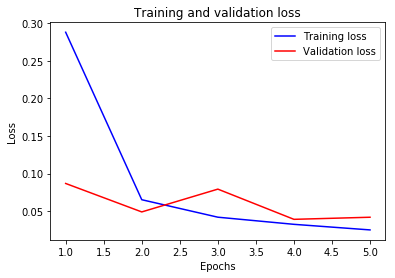

In [51]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 训练和验证的准确率曲线

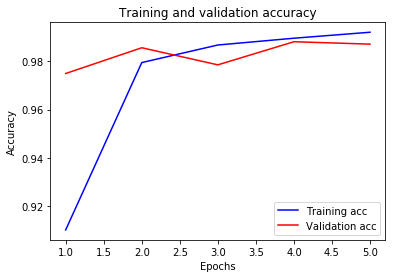

In [54]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 模型评估

In [55]:
# 在测试模式下返回模型的误差值和评估标准值
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(loss, acc)

10000/10000 [==============================] - 1s 89us/step
0.02937427353839157 0.9907000064849854


## 预测

In [72]:
# 在测试集中取10个向量进行预测
num = model.predict_classes(x_test[0:10])
print(num)

[7 2 1 0 4 1 4 9 5 9]
